In [58]:
from keras.datasets import reuters
import numpy as np

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(path='/home/bo/深度学习/python深度学习/reuters.npz', num_words=10000)

In [59]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [60]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [61]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [62]:
from keras import models
from keras import layers

In [63]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [64]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [65]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [66]:
history = model.fit(partial_x_train, partial_y_train, epochs=7, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/7
7982/7982 [==============================] - 1s - loss: 2.3231 - acc: 0.5301 - val_loss: 1.4577 - val_acc: 0.6830
Epoch 2/7
7982/7982 [==============================] - 0s - loss: 1.2382 - acc: 0.7276 - val_loss: 1.2019 - val_acc: 0.7280
Epoch 3/7
7982/7982 [==============================] - 0s - loss: 0.9161 - acc: 0.7934 - val_loss: 1.0864 - val_acc: 0.7670
Epoch 4/7
7982/7982 [==============================] - 0s - loss: 0.7118 - acc: 0.8356 - val_loss: 1.0101 - val_acc: 0.7800
Epoch 5/7
7982/7982 [==============================] - 0s - loss: 0.5304 - acc: 0.8827 - val_loss: 0.9917 - val_acc: 0.7950
Epoch 6/7
7982/7982 [==============================] - 0s - loss: 0.4180 - acc: 0.9092 - val_loss: 0.9648 - val_acc: 0.8050
Epoch 7/7
7982/7982 [==============================] - 0s - loss: 0.3210 - acc: 0.9305 - val_loss: 1.0292 - val_acc: 0.7990


In [67]:
results = model.evaluate(x_test, one_hot_test_labels)
results

2176/2246 [============================>.] - ETA: 0s

[1.1487683831636968, 0.7613535173907412]

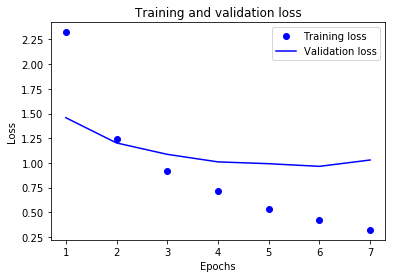

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

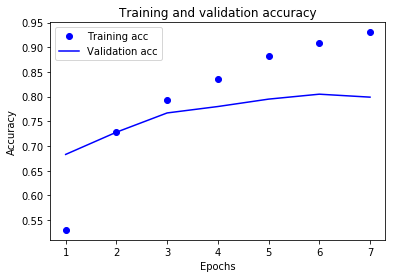

In [69]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [44]:
predictions = model.predict(x_test)
predictions[0].shape
np.sum(predictions[0])

1.0

In [45]:
np.argmax(predictions[0])

3